# **Pendulum With Drag**

In a simple pendulum we have a periodic movement, that is, a movement that goes and returns. If we drew the diagram force of the movement, we would have something like this:

![](https://i.imgur.com/EhtlaWJ.jpg)

When we talk about a simple pendulum, we mean that the angle $\theta$ is never greater than $sin(15°)$, so this implies that $sin(\theta) ≈ \theta$ then we won´t have a chaotic movement, as we will see a case later. If we wrote Newton's equations for this movement we would have:

$$\sum F_{x} = -Tsen(\theta) = m \frac {d^2x}{dt^2}$$

$$\sum F_{y} = Tcos(\theta) - mg = m \frac {d^2y}{dt^2}$$

As we see here, we have two equations to solve a system with three unknowns variables. This system becomes very ineffective and complex to solve, so the easiest solution is to **take this cartesian system to polar coordinates**. To take a good look at how the movement would be described in polar coordinates, let's look at the following image:

![](https://i.imgur.com/0vUtlHQ.jpg)

If we were to write Newton's equations for this "new system", we would have:

$$\sum F_{r} = T - mgcos(\theta) = m\frac {d^2 r}{dt^2}$$

$$sum F_{\theta} = -mg sin(\theta) = m \frac {dv_{\theta}}{dt}$$


If we look at the image we can see that $r$ is the length of the string, so its derivative is a constant so it is $0$. In addition, the equation of the sum of forces in $\theta$ can be described in a different way since the speed in this movement would be given by: $r \frac {d\theta}{dt}$ then the equations are described as follows:

$$T-mgcos(\theta) = 0$$

$$T = mgcos(\theta)$$

$$\frac {d^2\theta}{dt^2} = \frac {-g}{l} sen(\theta)$$

And these would be the equations that we must solve numerically.

---

In this notebook, the pendulum equation will be solved in four cases:

1. Simple pendulum with Euler's method (this is  for $\theta \leq 15°$)
2. Simple pendulum with the Euler-Cromer method (that is, for $\theta \leq 15°$)
3. Friction Pendulum (for large $\theta$ values)
4. Analytical solution for small angles with drag

It is important to let know the reader that we´re using Euler´s method just for show that this method **DOES NOT** work for the pendulum solutions. That´s why the rest of the code is calculated with Euler-Cromer´s method.






### **Simple Pendulum with Euler**

For this case:

$$\frac {d^2\theta}{dt^2} = \frac {-g}{l} \theta$$

Numerically:

$$\omega_{i+1} = \omega_{i} - Δt(\frac {g}{l} \theta_{i})$$

$$\theta_{i+1} = \theta_{i} + \omega_{i} Δt$$


This is:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
g = 9.8; theta = [0.1]; w = [0]; l = 1
time = np.linspace(0, 10, 200)

for i in range(len(time)-1):
  w.append(w[i] - g/l * theta[i] * time[1])
  theta.append(theta[i] + w[i] * time[1])

Text(0, 0.5, 'theta')

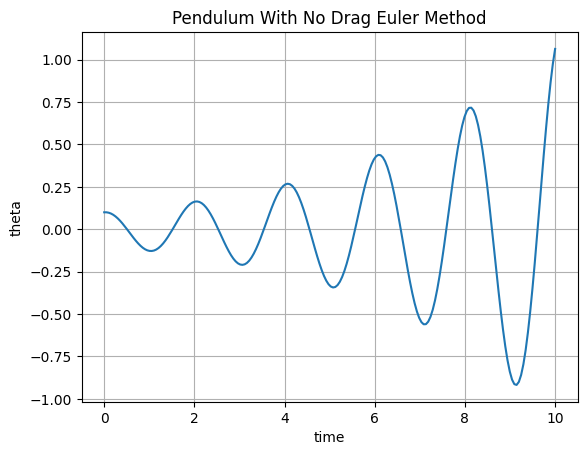

In [3]:
plt.plot(time, theta)
plt.grid("--")
plt.title("Pendulum With No Drag Euler Method")
plt.xlabel("time")
plt.ylabel("theta")

As we can see in the image, the method is unstable.

### **Simple Pendulum with Euler-Cromer**

We have the same case above but numerically it is as follows:

$$\omega_{i+1} = \omega_{i} - Δt(\frac {g}{l} \theta)$$

$$\theta_{i+1} = \theta_{i} + Δt (\omega_{i+1})$$

The code is:


In [4]:
g = 9.8; thetacromer = [0.2]; wcromer = [0]; l = 1

for i in range(len(time)-1):
  wcromer.append(wcromer[i] - g/l * thetacromer[i] * time[1])
  thetacromer.append(thetacromer[i] + time[1]*(wcromer[i+1]))

Text(0, 0.5, 'theta')

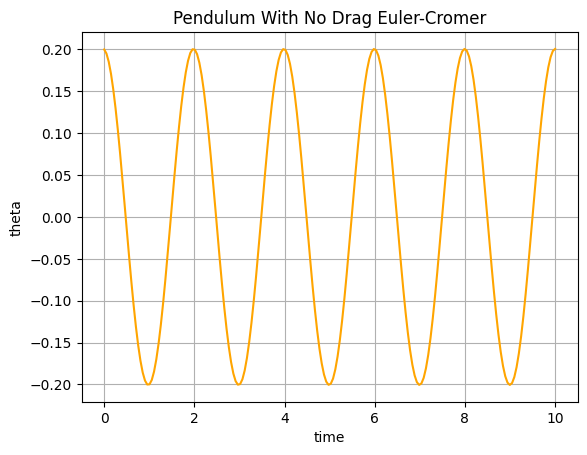

In [5]:
plt.plot(time, thetacromer, color="orange")
plt.grid("--")
plt.title("Pendulum With No Drag Euler-Cromer")
plt.xlabel("time")
plt.ylabel("theta")

### **Pendulum with Drag**

For this case we would have:

$$\frac {d^2\theta}{dt^2} = -\frac {g}{l} sin(\theta)- \frac {b}{m} \frac {d\theta}{dt}$$

Where $\frac {b}{m}$ is the coefficient $\gamma$ used in the previous codes. Since this equation is non-linear, what we will do is "take advantage" of the definition of angular frequency $\omega$ which is defined as the change of the angle with respect to time. So having it this way we can say that $\omega = \frac {d\theta}{dt}$. So our equation would be in terms of $\omega$ and would look like this:

$$\omega´ = -\frac {g}{l} sin(\theta)- \frac {b}{m} \omega$$

Now we can use Euler-Cromer again to solve it, and the numerical equations are as follows:


$$\omega_{i+1} = \omega_{i} + Δt(\frac {-g}{l} sin(\theta_{i}) - \gamma \omega_{i})$$

$$\theta_{i+1} = \omega_{i+1} + Δt(\theta_{i})$$

----

Since the idea is to observe several angles in a graph, we will create a function for this. It will receive as parameters a maximum time, a list of angles and the coefficient of viscosity, the latter is which is in the hands of the user to change. The dynamic viscosity of the air is quite low ($0.018$), so it is recommended to set a slightly larger number to see how the movement stops.

The code is as follows:



In [6]:
def frictionPendulum(tiempo, angulos, dynamic_viscosity, dt=0.01, g=9.8, l=0.5):
  miu = dynamic_viscosity; m = 10; g = 9.8; R=5; #Constantes
  b = 6*np.pi*R*miu
  gamma = b/m
  t = np.arange(0, tiempo+dt, dt)
  w2=[0]
  for theta_ in angulos:
    theta = [theta_, theta_]
    for i in range(1, int(tiempo/dt)):
        w2.append(w2[i-1] + t[1] * (-g/l * np.sin(theta[i-1]) - gamma * w2[i-1]))
        theta.append(theta[i-1] + t[1]*w2[i])
    plt.plot(t, theta, label=f"angulo={theta_}")
  plt.legend(loc="best"); plt.grid("--"); plt.ylabel("theta"); plt.xlabel("time"); plt.title("Pendulum with Drag Euler Cromer"); plt.show()
  pass

Calling our finction and giving it some angles converted into radians:

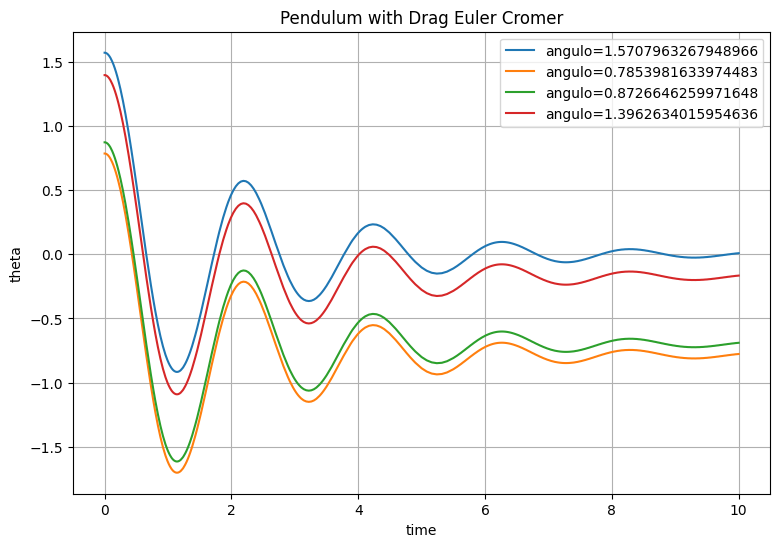

In [7]:
fig = plt.figure(figsize=(9,6))
frictionPendulum(10, [90*np.pi/180, 45*np.pi/180, 50*np.pi/180, 80*np.pi/180], 0.097)

### **Analytical Solution**

Now, with the purpose  of comparing the exact and analytical solutions, we solved the differential equation for **small angles** analitically which gave as a result:

$$\theta(t)= \theta_{0} e^{-\gamma t/2} sin(\omega t + \phi)$$

It is important to let clear that this is a possible solution when:

$$\omega = \sqrt{\frac {\gamma^2}{4} - \frac {g}{l}}$$

For large angles, the equation cannot be solved analytically since it is no longer linear ($sin(\theta)$ appears) in the second derivative of $\theta$. So, the solution of this analytic remains:

Text(0.5, 0, 'time')

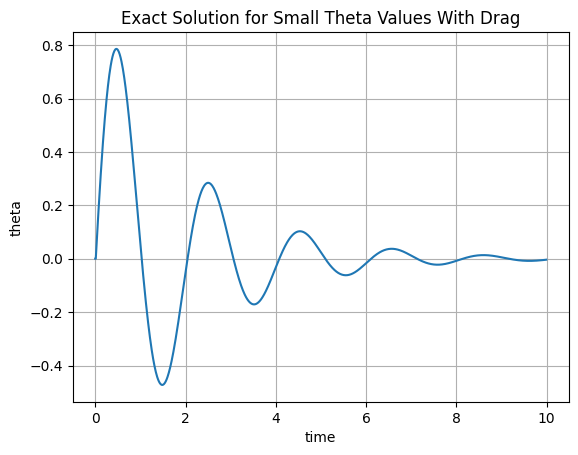

In [8]:
gamma = 1; phi = 0; theta = [0]; amp=1; phi=0; g =9.8; l=1
time = np.arange(0, 10, 0.01)
w = np.sqrt( abs((gamma**2 / 4) - (g/l)))
for i in range(len(time)-1):
  theta.append(amp * np.exp(-gamma*time[i]/2) * np.sin(w*time[i] + phi))

plt.plot(time, theta)
plt.title("Exact Solution for Small Theta Values With Drag")
plt.grid("--"); plt.ylabel("theta"); plt.xlabel("time")

With this image we can verify that the numerical code made in the previous step with the Euler-Cromer method gives the results correctly.

---

Now, let´s see something fun!!

Let´s watch an 3D animation on how a **Pendulum with Drag and Large Angles** works!

The animation was made with GlowScript that uses VPython for making 3D animations

In [9]:
%%html

<iframe src="simulaciones/PendulumAnimacion.html" width="800" height="450"></iframe>

---

We add in **[here](https://colab.research.google.com/drive/1pKgOH08jYh_EKt2V9_t32asiqvyXJIBb?usp=sharing)** a link to a Google Colab that has a bit of interface and/or interaction with the user and allows you to modify the initial values ​​of the graphs or directly play with the code. We hope you really use it because that´s the way where you would be able to use it for the specific values of your problem. 

Have Fun!! :)))